# Pymaceuticals Inc.
---

### Analysis

- Correlation and Regression Analysis clear shows the trends in the data that the heavier the mouse the Average tumor volume increases.
- The Analysis using pie chart has almost equal number of male vs females mice were used.
- Infubinol,Ceftamin shows Highest tumor volume whereas Capomulin, Ramicane shows Lowest tumor volume.
- Ketapril is the highest Mean Median and variance values.
 

In [153]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(study_results, mouse_metadata, how="left", on='Mouse ID')
# Display the data table for preview
merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [154]:
# Checking the number of mice.
mice_count = len(merge_df['Mouse ID'].unique())
mice_count

249

In [155]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = merge_df[merge_df.duplicated(subset= ['Mouse ID','Timepoint'], keep= 'first')]
print(duplicate_mice['Mouse ID'])

#duplicate_mice= merge_df.drop_duplicates(subset= ['Mouse ID','Timepoint'])
#print(duplicate_mice['Mouse ID'])

#print(merge_df.duplicated())
#merge_df[merge_df['Mouse ID'].duplicated(keep='first')]
#merge_df.duplicated().sum()


137     g989
360     g989
681     g989
869     g989
1111    g989
Name: Mouse ID, dtype: object


In [156]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_list= merge_df.loc[merge_df['Mouse ID']=='g989']
duplicate_mouse_list

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [157]:
#clean_df= merge_df.drop_duplicates(merge_df["Mouse ID" != 'g989'])
#print(len(clean_df['Mouse ID'].unique()))

In [158]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

'''
drop_duplicate= merge_df(merge_df.drop_duplicates['Mouse ID'])
drop_duplicate
print(merge_df['Mouse ID'].shape)
print(merge_df['Mouse ID'].drop_duplicates().count())
'''
#clean_df= pd.DataFrame(merge_df.drop_duplicates(subset=["Mouse ID"]))
clean_df= merge_df.loc[merge_df['Mouse ID']!='g989']
clean_df.describe()


,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
count,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000
mean,19.606383,50.435293,1.025000,12.757979,25.660106
std,14.094238,8.914197,1.139971,7.181998,3.935064
min,0.000000,22.050126,0.000000,1.000000,15.000000
25%,5.000000,45.000000,0.000000,7.000000,25.000000
50%,20.000000,48.933454,1.000000,13.000000,27.000000
75%,30.000000,56.324075,2.000000,19.250000,29.000000
max,45.000000,78.567014,4.000000,24.000000,30.000000


In [159]:
# Checking the number of mice in the clean DataFrame.
print(len(clean_df['Mouse ID'].unique()))


248


## Summary Statistics

In [160]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
regimens= clean_df.groupby(["Drug Regimen"])
#regimens.count()

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean= regimens["Tumor Volume (mm3)"].mean()
median= regimens["Tumor Volume (mm3)"].median()
variance= regimens["Tumor Volume (mm3)"].var()
stdev= regimens["Tumor Volume (mm3)"].std()
sem= regimens["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_df= pd.DataFrame({
    'Mean Tumor Volume' : mean,
    'Median Tumor Volume': median,
    'Tumor Volume Variance': variance,
    'Tumor Volume Std. Dev.': stdev,
    'Tumor Volume std. Err.': sem

})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [161]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
regimens.aggregate({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
# Using the aggregation method, produce the same summary statistics in a single line.


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of mice Tested')

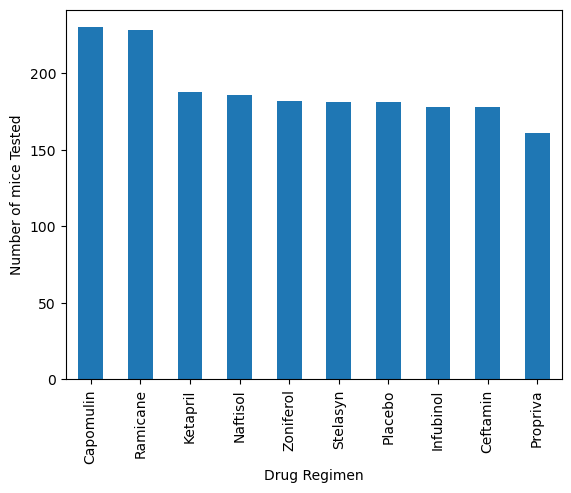

In [162]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

#timepoints_df= clean_df.groupby(["Drug Regimen"]).value_counts()
#print(timepoints_df)

timepoints_plot= merge_df["Drug Regimen"].value_counts().plot(kind='bar')

timepoints_plot.set_xlabel("Drug Regimen")
timepoints_plot.set_ylabel("Number of mice Tested")



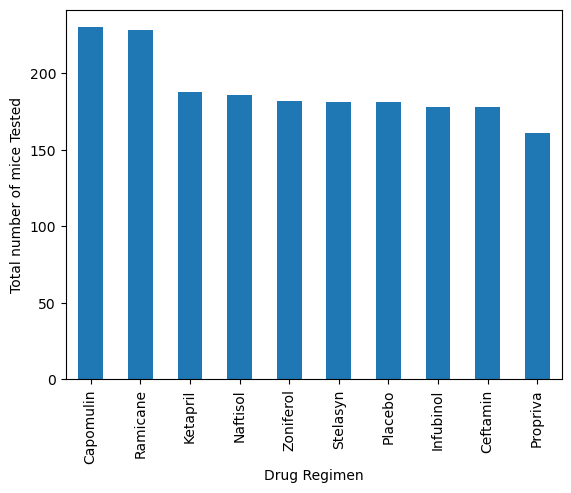

In [163]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

timepoints_plot= merge_df["Drug Regimen"].value_counts()
timepoints_plot.plot(kind='bar') 
plt.xlabel("Drug Regimen")
plt.ylabel("Total number of mice Tested")
plt.show()

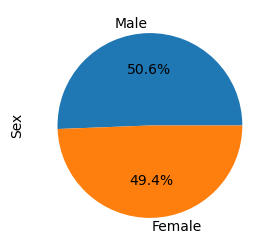

In [164]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_count= merge_df['Sex'].value_counts()
pie_plot= mice_count.plot(labels=['Male', 'Female'],kind='pie', y="Sex", autopct="%1.1f%%", figsize=(3,3) )


Male      958
Female    935
Name: Sex, dtype: int64


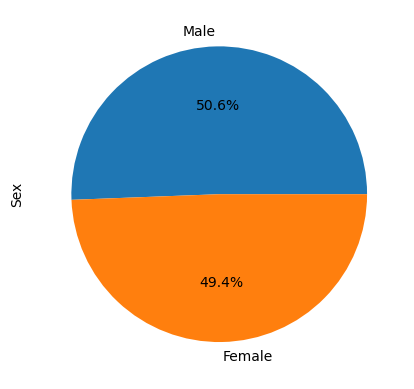

In [165]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

pie_plot1= merge_df['Sex'].value_counts()
print(pie_plot1)
sex= ["Male", "Female"]
count= [958, 935]
#colors= ["blue", "orange"]
#male=958,female=935 total=1893
plt.pie(count, labels= sex, autopct= "%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [166]:
Capomulin_df= clean_df.loc[clean_df['Drug Regimen']=='Capomulin']
Famicane_df= clean_df.loc[clean_df['Drug Regimen']=='Ramicane']
Infubinol_df= clean_df.loc[clean_df['Drug Regimen']=='Infubinol']
Ceftamin_df= clean_df.loc[clean_df['Drug Regimen']=='Ceftamin']

four_regimens=[Capomulin_df, Famicane_df, Infubinol_df, Ceftamin_df]
four_regimens_df=pd.concat(four_regimens)
four_regimens_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1858,k210,45,68.923185,3,Ceftamin,Male,15,28
1862,x822,45,61.386660,3,Ceftamin,Male,3,29
1864,l733,45,64.299830,1,Ceftamin,Female,4,30
1872,o287,45,59.741901,4,Ceftamin,Male,2,28


In [167]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df= clean_df.loc[clean_df['Drug Regimen']=='Capomulin']
Famicane_df= clean_df.loc[clean_df['Drug Regimen']=='Ramicane']
Infubinol_df= clean_df.loc[clean_df['Drug Regimen']=='Infubinol']
Ceftamin_df= clean_df.loc[clean_df['Drug Regimen']=='Ceftamin']

four_regimens=[Capomulin_df, Famicane_df, Infubinol_df, Ceftamin_df]
four_regimens_df=pd.concat(four_regimens)
#four_regimens_df

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint= clean_df.groupby('Mouse ID')['Timepoint'].max()
greatest_timepoint_df=pd.DataFrame(greatest_timepoint)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_volume_four = pd.merge(four_regimens_df, greatest_timepoint_df, on=['Mouse ID'])
tumor_volume_four['Greatest Timepoint']= tumor_volume_four['Timepoint_x']==tumor_volume_four['Timepoint_y']

tumor_volume_four.drop(tumor_volume_four.loc[tumor_volume_four['Greatest Timepoint']==False].index, inplace=True)

tumor_volume_df= tumor_volume_four[['Mouse ID', 'Drug Regimen', 'Timepoint_x', 'Tumor Volume (mm3)']]
tumor_volume_df

,Mouse ID,Drug Regimen,Timepoint_x,Tumor Volume (mm3)
9,b128,Capomulin,45,38.982878
17,j246,Capomulin,35,38.753265
27,r554,Capomulin,45,32.377357
37,s185,Capomulin,45,23.343598
47,b742,Capomulin,45,38.939633
...,...,...,...,...
787,p438,Ceftamin,45,61.433892
793,b487,Ceftamin,25,56.057749
803,o287,Ceftamin,45,59.741901
812,q483,Ceftamin,40,64.192341


In [168]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimens= ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume=[]

# tumor_volume_capomulin=[]
# tumor_volume_ramicane=[]
# tumor_volume_Infubinol=[]
# tumor_volume_ceftamin=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for each_drug in treatment_regimens:
    volume = tumor_volume_df.loc[tumor_volume_df['Drug Regimen']== each_drug]['Tumor Volume (mm3)']
    tumor_volume.append(volume)
    # print(tumor_volume)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    quartile= volume.quantile([0.25,0.5,0.75])
    lower=quartile[0.25]
    upper=quartile[0.75]
    iqr= upper - lower
    #print(iqr) 
    
    # Determine outliers using upper and lower bounds
    lower_bound = lower - (1.5*iqr)
    upper_bound = upper + (1.5*iqr)
    outliers=volume.loc[(volume > upper_bound)|(volume < lower_bound)]
   
    if len(outliers) > 0:
        print(f"{each_drug}'s potential outliers : {outliers} ")


Infubinol's potential outliers : 459    36.321346
Name: Tumor Volume (mm3), dtype: float64 


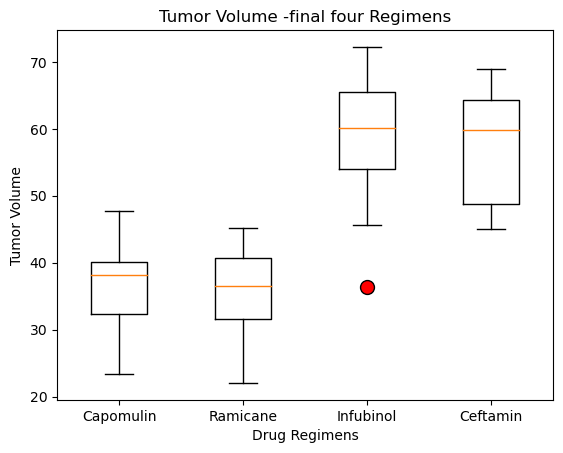

In [169]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops= dict(marker='o', markerfacecolor='r', markersize=10, markeredgecolor='black')
plt.boxplot(tumor_volume, labels = treatment_regimens , flierprops=flierprops ) 
plt.xlabel("Drug Regimens")
plt.ylabel("Tumor Volume")
plt.title("Tumor Volume -final four Regimens")
plt.show()

## Line and Scatter Plots

In [170]:
mouseID_l509= Capomulin_df.loc[Capomulin_df['Mouse ID']== 'l509']
mouseID_l509

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21
1146,l509,25,44.006257,2,Capomulin,Male,17,21
1414,l509,30,44.708055,2,Capomulin,Male,17,21
1499,l509,35,40.207288,2,Capomulin,Male,17,21
1723,l509,40,40.770813,2,Capomulin,Male,17,21
1771,l509,45,41.483008,3,Capomulin,Male,17,21


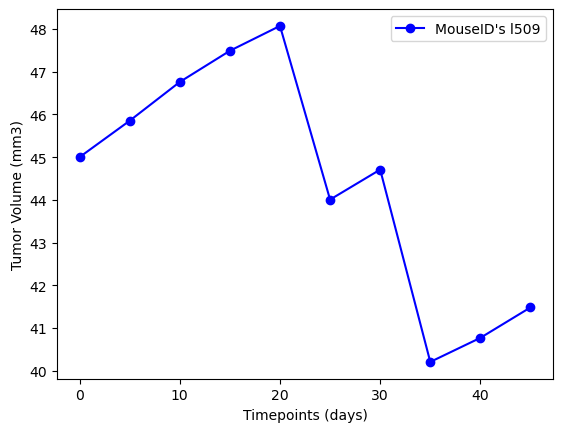

In [171]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

mouseID_l509= Capomulin_df.loc[Capomulin_df['Mouse ID']=='l509']
x= mouseID_l509['Timepoint']
y= mouseID_l509['Tumor Volume (mm3)']

plt.plot(x, y, color='blue', label="MouseID's l509", marker='o')
plt.legend(loc='best')
plt.xlabel('Timepoints (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [172]:

mouse_data= Capomulin_df.groupby('Mouse ID')
average_Tumor_volume= mouse_data['Tumor Volume (mm3)'].mean()
mouse_weight= mouse_data['Weight (g)'].unique()


mouse_df= pd.DataFrame({'Weight (g)': mouse_weight, 'Average Tumor Volume (mm3)': average_Tumor_volume})


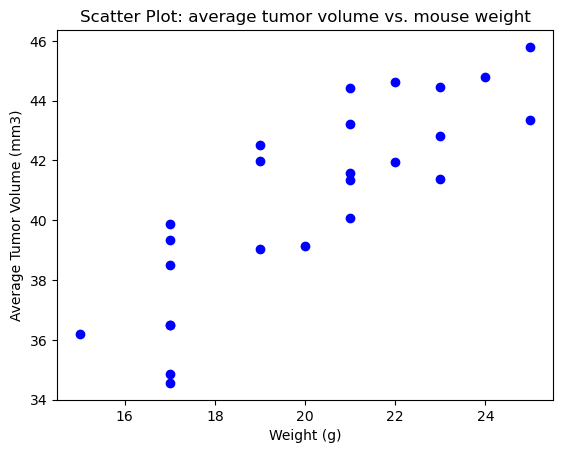

In [173]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
x= mouse_df['Weight (g)']
y=mouse_df['Average Tumor Volume (mm3)']

plt.title("Scatter Plot: average tumor volume vs. mouse weight")
plt.scatter(x, y, marker="o", color="blue")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


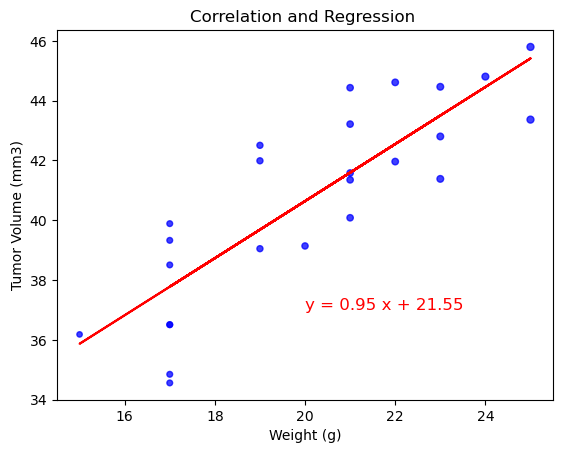

In [187]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# calulate Correlation coeficient 
correlation = st.pearsonr(x,y)

#Assign X_values Type as float
x= x.astype(float)

# calculate Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq = f"y = {round(slope,2)} x + {round(intercept,2)}"

# Scatter plot and linear regression  
plt.scatter(x, y, marker="o", facecolors="blue", s=x, alpha=0.75 )
plt.title("Correlation and Regression ")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
#plot line
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq,(20,37),fontsize=12,color="red")
# print correlation Coefficient
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
plt.show()